In [ ]:
import sys
sys.path.append(r'C:\Users\Mechano_2\PycharmProjects\pro')
sys.path

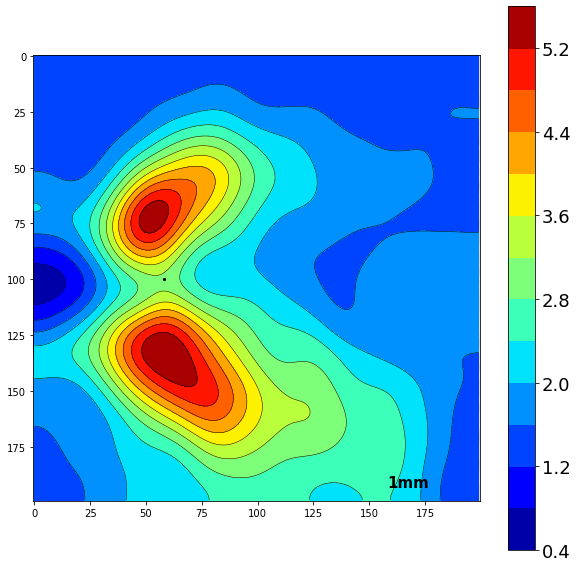

In [46]:
import mecha.DIC as dic
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mecha.fracture
import matplotlib.patches as patches
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Material property
n_hardening=17
yield_strength=535.435
poisson_ratio=0
alpha=0.585
In=2.78
youngs_modulus=71.7*1000

# Img parameter
contour_level = 15
ratio = 2/60
left, right, up_down = 50,150,100

# pick point
radius_gap = 1.5
gap_count = 12
start_gap = 0.45

path = r'../data/CT_img'
save_path =r'../data/CT_img'
image = dic.load_file(path)

crack_tip = [[302,376],[285,369],[303,396],[285,384],[303,425],[285,411]] # y, x


i = 4 ##ref
j = 5##cur

ref = list(image.keys())[i]
cur = list(image.keys())[j]

src_reference = image[ref][:,:,1][crack_tip[i][0]-up_down:crack_tip[i][0]+up_down,crack_tip[i][1]-left:crack_tip[i][1]+right]
src_current = image[cur][:,:,1][crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]

dst = cv2.absdiff(src_current.astype('float64'),src_reference.astype('float64'))
dst = dst.astype(float)
dst = np.where(dst>10, dst*0, dst)
gas = cv2.GaussianBlur(dst,(0,0),10)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(src_current, cmap='gray')
# plt.axis('off')
csf = ax.contourf(gas, contour_level, cmap = 'jet')
CS = ax.contour(gas, contour_level, colors='black', linewidths = 0.5)

cbar= plt.colorbar(csf)
cbar.ax.tick_params(labelsize=18)
plt.text( 158,193, '1mm', fontsize=15, fontweight='bold')

# max_crack_tip = [left,up_down]
max_crack_tip = [np.argmax(gas)%(left+right), up_down]
# max_crack_tip = [np.argmax(gas)%(left+right), np.argmax(gas)//(left+right)]#x,y
# plt.scatter(max_crack_tip[0],max_crack_tip[1], color= 'black', s=10)

count = 0
radius_g = 0
location = []
for _ in range(1, gap_count):
    if count == 0:
        location = dic.circle_location(start_gap/ratio, ratio,90,0)
        radius_g += radius_gap
        count += 1
    else:
        location = np.vstack((location, dic.circle_location(start_gap/ratio+radius_g, ratio,90,0)))
        radius_g += radius_gap

df = pd.DataFrame(location, columns=['x', 'y', 'angle', 'r'])
df.x = df.x + max_crack_tip[0]
df.y = df.y + max_crack_tip[1]
df.r = df.r*0.001

plt.scatter(max_crack_tip[0], up_down, s = 5,  c = 'black')
plt.savefig(save_path + './3.png', dpi = 300)
# plt.scatter(df.x, df.y, s = 5,  c='black')


In [ ]:
ax.add_patch(
     patches.Rectangle(
        (155, 184),
        30,
        2,
        edgecolor = 'black',
        facecolor = 'black',
        fill=True
     ) )

# plt.scatter(df['x'],df['y'],color='black',s=0.8)
# plt.title('Elastic k1: ' +  str(np.round(elastic_k1,3)) + '  | j : ' + str(np.round(j_integral,3)))
# plt.savefig(save_path+'./%d.png'%j,dpi=300, bbox_inches='tight')
plt.axis('off')
plt.savefig(r'E:\사진/컨투어%d.png'%j,dpi=300,bbox_inches='tight')
print(elastic_k1,j_integral)

gas_strain = gas.copy()
for i_ in range(np.shape(gas_strain)[0]):
    for j_ in range(np.shape(gas_strain)[1]):
        value = strain_data[find_nearest(strain_data[:,1],gas_strain[i_][j_]), 0]
        gas_strain[i_][j_] = value

fig, ax = plt.subplots(figsize=(10, 10))



ax.imshow(src_current, cmap='gray')
# plt.axis('off')
csf = ax.contourf(gas_strain, contour_level, cmap = 'jet')
CS = ax.contour(gas_strain, contour_level, colors='black', linewidths = 0.5)


cbar= plt.colorbar(csf)
cbar.ax.tick_params(labelsize=18)

plt.scatter(max_crack_tip[0],max_crack_tip[1], color='blue', s=15,zorder=10)
plt.scatter(50,100, color='purple', s=15,zorder=11)
ax.text( 158,193, '1mm', fontsize=9, fontweight='bold')
ax.axis('off')
plt.savefig(r'E:\사진/effective%d.png'%j,dpi=300,bbox_inches='tight')

In [ ]:
df[df['angle']==0]

In [ ]:
plt.text( 158,193, '1mm', fontsize=9, fontweight='bold')
cur = cv2.equalizeHist(src_current)
plt.imshow(cur, cmap='gray')
plt.axis('off')

plt.show()
# plt.savefig(r'E:\사진/d%d.png'%j,dpi=300,bbox_inches='tight')
plt.close()

plt.text( 158,193, '1mm', fontsize=9, fontweight='bold')
plt.imshow(src_current, cmap='gray')
plt.axis('off')
plt.show()
# plt.savefig(r'E:\사진/dd%d.png'%j,dpi=300,bbox_inches='tight')
plt.close()


In [ ]:
import pickle
import cv2

from matplotlib.gridspec import GridSpec

ee_resize = gas
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(nrows=6, ncols=5)
# First axes
ax0 = fig.add_subplot(gs[0:4, 0:4])
# ax0.imshow(ee_resize,cmap='gray')
plt.contourf(ee_resize, cmap= 'jet')
ax0.vlines(50,0,np.shape(ee_resize)[0]-1, color='black', linestyles='-.')
ax0.hlines(100,0,np.shape(ee_resize)[1]-1, color='red')
plt.gca().invert_yaxis()
ax0.text( 158,193, '1mm', fontsize=9, fontweight='bold')
ax0.axis('off')
ax0.add_patch(
     patches.Rectangle(
        (150, 184),
        30,
        2,
        edgecolor = 'black',
        facecolor = 'black',
        fill=True
     ) )

# v axes
# ax1 = fig.add_subplot(gs[0:4, 4])
# ax1.plot(value[:,x_point],np.arange(len(value[:,x_point])),color='red')
# ax1.yaxis.set_label_position("right")
# ax1.yaxis.tick_right()
# plt.gca().invert_yaxis()
# u axes
profile_strain=gas[100,:]
#
# for i in range(np.shape(ee_resize[100,:])[0]):
#     profile_strain = np.append(profile_strain, strain_data[find_nearest(strain_data[:,1], ee_resize[100,i]),0])
#

ax2 = fig.add_subplot(gs[4, 0:4])


ax2.plot(profile_strain, color='red')
# ax2.plot(ee_resize[100,:])
# ax2.plot(savgol_filter(value[:,y_point],31,2), color='green')

ax2.vlines(50,0,3.5, color='black', linestyles='-.')
# ax2.set_ylim(0,3.5)
ax2.set_xlim(0,200)
plt.grid()
plt.savefig(save_path+'/%dslop.3더한거.png'%j, dpi=300)
# plt.close()

plt.show()
plt.close()
with open(r'C:\Users\Mechano_2\PycharmProjects\pro\paper_code_aluminum/ml.pkl','wb') as f:
    pickle.dump(ee_resize, f)

print('Save Done')

In [ ]:
left_cut = 90
rigt_cut = -300
up_down_cut = 200
fig,ax = plt.subplots(1,2)

ax[0].imshow(image['ff0870'][up_down_cut:-up_down_cut,left_cut:rigt_cut])
ax[0].scatter(crack_tip[0][1]-left_cut,crack_tip[0][0]-up_down_cut,c='red')
ax[0].add_patch(
     patches.Rectangle(
        (crack_tip[0][1]-left-left_cut, crack_tip[0][1]+up_down-up_down_cut),
        right+left,
        up_down*2,
        edgecolor = 'red',
        facecolor = 'black',
        fill=False, lw=3, ls=':'
     ) )
ax[0].axis('off')

ax[1].imshow(image['ff3569'][up_down_cut:-up_down_cut,left_cut:rigt_cut])
ax[1].scatter(crack_tip[-1][1]-left_cut,crack_tip[-1][0]-up_down_cut,c='red')
ax[1].add_patch(
     patches.Rectangle(
        (crack_tip[-1][1]-left-left_cut, crack_tip[-1][1]+up_down-up_down_cut),
        right+left,
        up_down*2,
        edgecolor = 'red',
        facecolor = 'black',
        fill=False, lw=3, ls=':'
     ) )
ax[1].axis('off')

plt.savefig(r'E:\사진/겹d치기%d.png'%j,dpi=300,bbox_inches='tight')


In [ ]:
# import sys
# sys.path.append(r'C:\Users\Mechano_2\PycharmProjects\pro')
# sys.path

In [94]:
import mecha.DIC as dic
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mecha.fracture as fracture
from scipy import io
import matplotlib.patches as patches

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

num = 4
# pick point
radius_gap = 1.5
gap_count = 12
start_gap = 0.45

path = r'C:\Users\ghrms\PycharmProjects\project\data\CT_img'

file_num  = '1'
uu = io.loadmat(path+'/DIC_img/data/'+file_num+'_uu.mat')['uu']
vv = io.loadmat(path+'/DIC_img/data/'+file_num+'_vv.mat')['vv']
uu_resize = cv2.resize(uu,(0,0),fx=2, fy=2 )
vv_resize = cv2.resize(vv,(0,0),fx=2, fy=2 )

exx = io.loadmat(path+'/DIC_img/data/'+file_num+'_exx.mat')['exx']
eyy = io.loadmat(path+'/DIC_img/data/'+file_num+'_eyy.mat')['eyy']
exy = io.loadmat(path+'/DIC_img/data/'+file_num+'_exy.mat')['exy']
ee = fracture.effective_strain(exx, eyy, exy)
# np.savetxt(path+'/DIC'+'/'+file_num+'/ee.csv',ee)
exx_resize = cv2.resize(exx,(0,0),fx=2, fy=2 )
eyy_resize = cv2.resize(eyy,(0,0),fx=2, fy=2 )
exy_resize = cv2.resize(eyy,(0,0),fx=2, fy=2 )
ee_resize = cv2.resize(ee,(0,0),fx=2, fy=2 )
# cv2.flip(ee_resize,1,ee_resize)
# cv2.flip(uu_resize,1,uu_resize)
# cv2.flip(vv_resize,1,vv_resize)
left, right, up_down = 50,150,100
crack_tip = [[302,376],[285,369],[303,396],[285,384],[303,425],[285,411]] # y, x



i = 5##cur
dic = ee_resize[crack_tip[i][0]-up_down:crack_tip[i][0]+up_down,crack_tip[i][1]-left:crack_tip[i][1]+right]



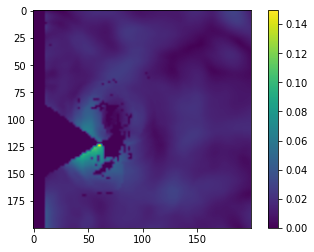

In [95]:
plt.imshow(dic)
plt.colorbar()

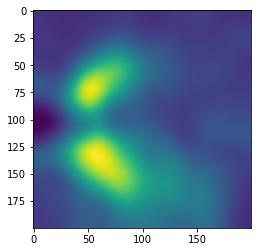

In [47]:
plt.imshow(gas)

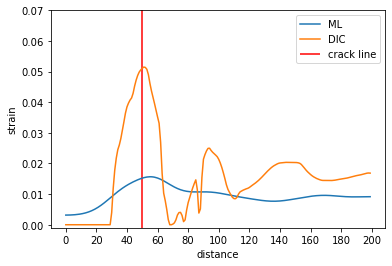

In [96]:
plt.plot(gas[100,:]/200, label='ML')
plt.plot(dic[100,:], label='DIC')
plt.vlines(50,-1,2, colors='red', label='crack line')
plt.legend()
plt.xticks([i for i in range(0,200+20,20)])

plt.ylim(-0.001,0.07)
plt.ylabel('strain')
plt.xlabel('distance')
plt.show()